# Problem Statement:  Predicting domestic flight delay 


### Breakdown of problem:
#### 1. Getting data from flightradar (web scraping)
#### 2.  Data preprocessing / Manipulation
#### 3. performing EDA
#### 4. prediction 

# Establishing MongoDB connection

In [1]:
from pymongo import MongoClient
client=MongoClient()
db=client.flight_data
collection_1=db.flight_data_collection
import datetime 
import pandas as pd 

def from_unix_timestamp(val):
     #print("Date=", val)
     if (val is None):
         return datetime.datetime.fromtimestamp(0)
     if(val!=0):
      return datetime.datetime.fromtimestamp(val)

In [2]:
print(collection_1.find()[0])


{'_id': ObjectId('58b64d7e566f5d11bce4ac92'), 'aircraft': {'model': {'code': 'A320', 'text': 'Airbus A320-232'}, 'hex': '800AF3', 'registration': 'VT-IAL', 'serialNo': None, 'age': {'availability': True}, 'restricted': False, 'availability': {'serialNo': True, 'age': True}}, 'airline': {'name': 'IndiGo', 'short': 'IndiGo Airlines', 'code': {'iata': '6E', 'icao': 'IGO'}}, 'airport': {'origin': {'name': 'Mumbai Chhatrapati Shivaji International Airport', 'code': {'iata': 'BOM', 'icao': 'VABB'}, 'position': {'latitude': 19.08868, 'longitude': 72.867912, 'country': {'name': 'India', 'code': 'IN'}, 'region': {'city': 'Mumbai'}}, 'timezone': {'name': 'Asia/Kolkata', 'offset': 19800, 'abbr': 'IST', 'abbrName': 'India Standard Time', 'isDst': False}, 'visible': True}, 'destination': {'name': 'Delhi Indira Gandhi International Airport', 'code': {'iata': 'DEL', 'icao': 'VIDP'}, 'position': {'latitude': 28.5665, 'longitude': 77.103081, 'country': {'name': 'India', 'code': 'IN'}, 'region': {'city'

In [2]:
from geopy.distance import vincenty
#a=x['airport']["origin"]['position']['latitude']
#b=x['airport']['origin']['position']['longitude']
#m=(a,b)
#c=x['airport']['destination']['position']['latitude']
#d=x['airport']['destination']['position']['longitude']
#n=(c,d)
#z=vincenty(m,n)
#print(type(z))
#print(z)


In [83]:
flight_number=[]
status_text=[]
origin=[]
destination=[]
scheduled_departure=[]
scheduled_arrival=[]
real_departure=[]
real_arrival=[]
estimated_departure=[]
estimated_arrival=[]
duration=[]
timestamp=[]
for item in collection_1.find()[0:50]:
    if item['identification']['number']['default']==None:
        flight_number.append("None")
    else:
        flight_number.append(item['identification']['number']['default'])
    if item['status']['text']==None:
        status_text.append("None")
    else:
        status_text.append(item['status']['text'])
    if item['airport']['origin']==None:
        origin.append("None")
    else:
        origin.append(item['airport']['origin']['name'])
    if item['airport']['destination']==None:
        destination.append("None")
    else:
        destination.append(item['airport']['destination']['name'])
    if item['time']['estimated']['arrival']==None:
        estimated_arrival.append("None")
    else:
        estimated_arrival.append(item['time']['estimated']['arrival'])
    if item['time']['estimated']['departure']==None:
        estimated_departure.append("None")
    else:
        estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
    if item['time']['scheduled']['arrival']==None:
        scheduled_arrival.append('None')
    else:
        scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
    if item['time']['scheduled']['departure']==None:
        scheduled_departure.append('None')
    else:
        scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
    if item['time']['real']['arrival']==None:
        real_arrival.append('None')
    else:
        real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
    if item['time']['real']['departure']==None:
        real_departure.append('None')
    else:
        real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
    if item['time']['other']['duration']==None:
        duration.append("None")
    else:
        duration.append(item['time']['other']['duration'])
    timestamp.append(item['_id'].generation_time)
        

In [84]:
import pandas as pd 

df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration})

df=df[["timestamp","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration"]]

# Preprocessing function

In [4]:
#Function for extracting useful information from the database 

def extract(collection):
    from geopy.distance import vincenty
    import pandas as pd 
    flight_number=[]
    status_text=[]
    origin=[]
    destination=[]
    scheduled_departure=[]
    scheduled_arrival=[]
    real_departure=[]
    real_arrival=[]
    estimated_departure=[]
    estimated_arrival=[]
    duration=[]
    timestamp=[]
    distance_travelled=[]
    country_origin=[]
    country_destination=[]
    airline_name=[]
    registration=[]
    model=[]
    model_text=[]
    for item in collection:
        if item['airport']['origin']==None or item['airport']['destination']==None:
            distance_travelled.append("0 km")
        else:
            n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            distance_travelled.append((vincenty(m,n)))
            #country.append(item['airport']['origin']['position']['country']['name'])
            
        if item['identification']['number']['default']==None:
            flight_number.append("None")
        else:
            flight_number.append(item['identification']['number']['default'])
        if item['status']['text']==None:
            status_text.append("None")
        else:
            status_text.append(item['status']['text'])
        if item['airport']['origin']==None:
            origin.append("None")
            country_origin.append("None")
            #distance_travelled.append('None')
        else:
            origin.append(item['airport']['origin']['name'])
            country_origin.append(item['airport']['origin']['position']['country']['name'])
            #m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            #n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            #distance_travelled.append((vincenty(m,n)))
            
        if item['airport']['destination']==None:
            destination.append("None")
            country_destination.append("None")
        else:
            destination.append(item['airport']['destination']['name'])
            country_destination.append(item['airport']['destination']['position']['country']['name'])
        if item['time']['estimated']['arrival']==None:
            estimated_arrival.append("None")
        else:
            estimated_arrival.append(item['time']['estimated']['arrival'])
        if item['time']['estimated']['departure']==None:
            estimated_departure.append("None")
        else:
            estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
        if item['time']['scheduled']['arrival']==None:
            scheduled_arrival.append('None')
        else:
            scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
        if item['time']['scheduled']['departure']==None:
            scheduled_departure.append('None')
        else:
            scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
        if item['time']['real']['arrival']==None:
            real_arrival.append('None')
        else:
            real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
        if item['time']['real']['departure']==None:
            real_departure.append('None')
        else:
            real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
        # New added code
        if item['aircraft']['registration']==None:
            registration.append("None")
            model.append("None") # new code on 29th march
            model_text.append("None") #new code on 29th march 
        else:
            registration.append(item['aircraft']['registration'])
            model.append(item['aircraft']['model']['code'])      #new code
            model_text.append(item['aircraft']['model']['text']) #new code
        if item['airline']==None or item['airline']['name']==None:
            airline_name.append("None")
        else:
            airline_name.append(item['airline']['name'])
        if item['time']['other']['duration']==None:
            duration.append("None")
        else:
            duration.append(item['time']['other']['duration'])
        timestamp.append(item['_id'].generation_time)
        
    df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration,"distance_travelled":distance_travelled,
                    "country_origin":country_origin,"country_dest":country_destination,"reg":registration,
                     "airline_name":airline_name,"model":model,"model_text":model_text})

    df=df[["timestamp","reg","airline_name","model","model_text","country_origin","country_dest","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration","distance_travelled"]]
    
    return df
        
    

In [6]:
k=extract(collection_1.find())

In [6]:
#k.to_csv("data_3rd_april.csv",sep=',')

In [90]:
#type(k.to_dict('records'))


In [7]:
k.shape

(434690, 19)

## Data preprocessing - removing rows with missing values

#####   we are excluding all those data points for which  there is "None" value  , as they are irrelevent for analysis.

In [8]:
data=k[k.scheduled_arrival!="None"]
data=data[data.real_arrival!="None"]
data=data[data.real_departure!='None']
data=data[data.scheduled_departure!='None']


In [9]:
new_data=data.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status","country_origin","country_dest","reg","airline_name","model","model_text"])

In [10]:
new_data.shape

(107839, 19)

In [11]:
new_data.head()

,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled
7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,2017-03-01 08:25:00,None,None,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km
8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,2017-02-28 22:55:00,None,None,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km
9,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E5156,Delhi Indira Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-02-28 19:20:00,2017-02-28 20:30:00,None,None,2017-02-28 19:29:33,2017-02-28 20:13:00,Landed 20:13,2665,423.7601185098625 km
10,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E174,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-02-28 16:30:00,2017-02-28 18:40:00,None,None,2017-02-28 16:49:10,2017-02-28 18:23:00,Landed 18:23,5660,1134.6651511087132 km
11,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,None,None,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km


In [12]:
# writing to csv , uncomment the code for the same 
#new_data.to_csv("domestic_refined.csv")

In [11]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
model                                                             object
model_text                                                        object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                               object
scheduled_arrival                                                 object
estimated_departure                                               object
estimated_arrival                                  

In [12]:
new_data["scheduled_departure"]=pd.to_datetime(new_data.scheduled_departure)
new_data['scheduled_arrival']=pd.to_datetime(new_data.scheduled_arrival)
new_data['real_arrival']=pd.to_datetime(new_data.real_arrival)
new_data['real_departure']=pd.to_datetime(new_data.real_departure)

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [13]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
model                                                             object
model_text                                                        object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                       datetime64[ns]
scheduled_arrival                                         datetime64[ns]
estimated_departure                                               object
estimated_arrival                                  

In [14]:
new_data["arrival_delay"]=(new_data['real_arrival']-new_data['scheduled_arrival']).astype('timedelta64[m]')
new_data['departure_delay']=(new_data['real_departure']-new_data['scheduled_departure']).astype('timedelta64[m]')

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
new_data.shape

(107839, 21)

In [16]:
new_data["hour_dep"]=new_data.scheduled_departure.dt.hour
new_data["weekday_dep"]=new_data.scheduled_departure.dt.weekday_name
new_data["day_of_month_dep"]=new_data.scheduled_departure.dt.day


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Duration of collected dataset 

In [17]:
print("MAXIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.max())
print("\n")
print("MINIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.min())

MAXIMUM TIMESTAMP IN DATASET:
2017-04-03 09:55:00


MINIMUM TIMESTAMP IN DATASET:
2017-02-22 00:55:00


In [18]:
#Shape of datafarme
new_data.shape
#new_data.to_csv("refined_data.csv")

(107839, 24)

In [19]:
new_data.describe(include=["object"])

,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,estimated_departure,estimated_arrival,status,duration,distance_travelled,weekday_dep
count,107839,107839,107839,107839,107839,107839,107839,107839,107839,107839,107839,107839,107839,107839,107839
unique,449,13,15,40,33,30,2637,109,104,1,1,1440,12283,107814,7
top,VT-JCR,IndiGo,A320,Airbus A320-232,India,India,6E339,Delhi Indira Gandhi International Airport,Delhi Indira Gandhi International Airport,None,None,Landed 21:00,2940,0 km,Friday
freq,372,38230,53087,34090,99575,99467,228,20568,20812,107839,107839,156,922,26,16856


##  Filtering out domestic flights only

In [20]:
# removing international flights 

new_data_domestic=new_data[(new_data.country_origin=="India") & (new_data.country_dest=="India")]

In [21]:
new_data_domestic.shape
#del new_data_domestic["timestamp"]
#new_data_domestic.to_csv("all_domestic_29th_March.csv")

(91471, 24)

In [22]:
qwe=new_data_domestic.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status","reg","airline_name"])

In [23]:
qwe.shape

(91471, 24)

## Contribution of Individual domestic carriers

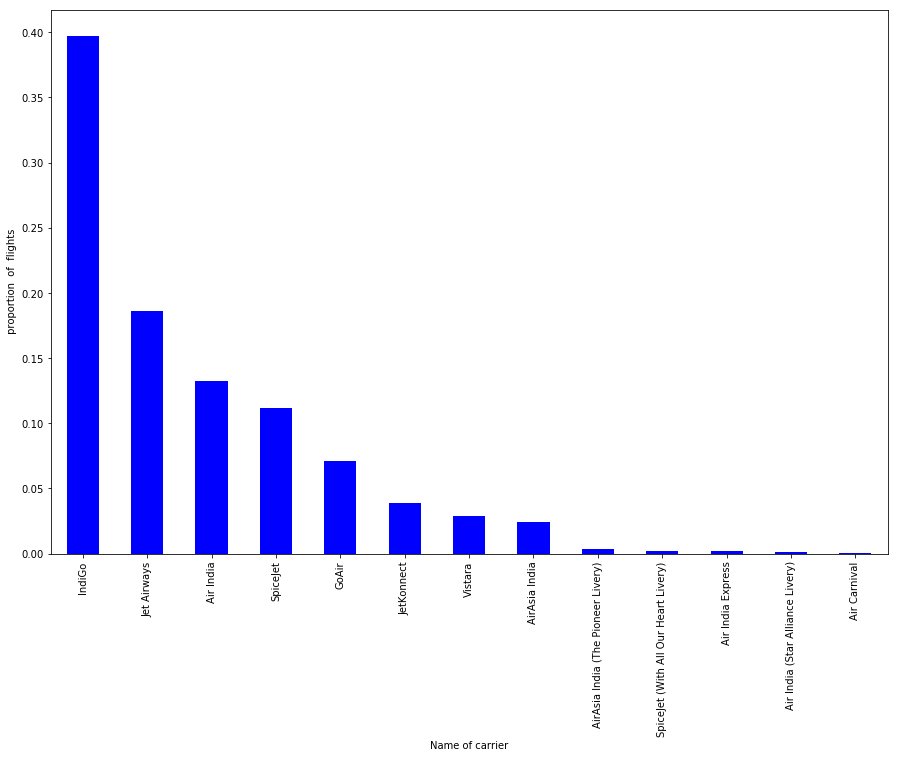

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
qwe.airline_name.value_counts(normalize=True).plot(kind="Bar",figsize=(15,10),color="blue")
plt.ylabel(" proportion  of  flights")
plt.xlabel("Name of carrier")

## Distribution of flights by day of the week 

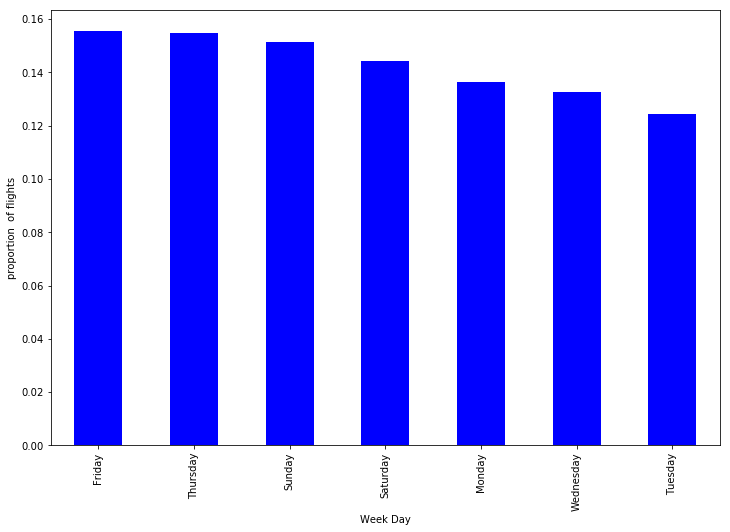

In [54]:
qwe.weekday_dep.value_counts(normalize=True).plot(kind="bar",figsize=(12,8),color="b")
plt.ylabel("proportion  of flights")
plt.xlabel("Week Day")

## Distribution of flights by ORIGIN Airport 

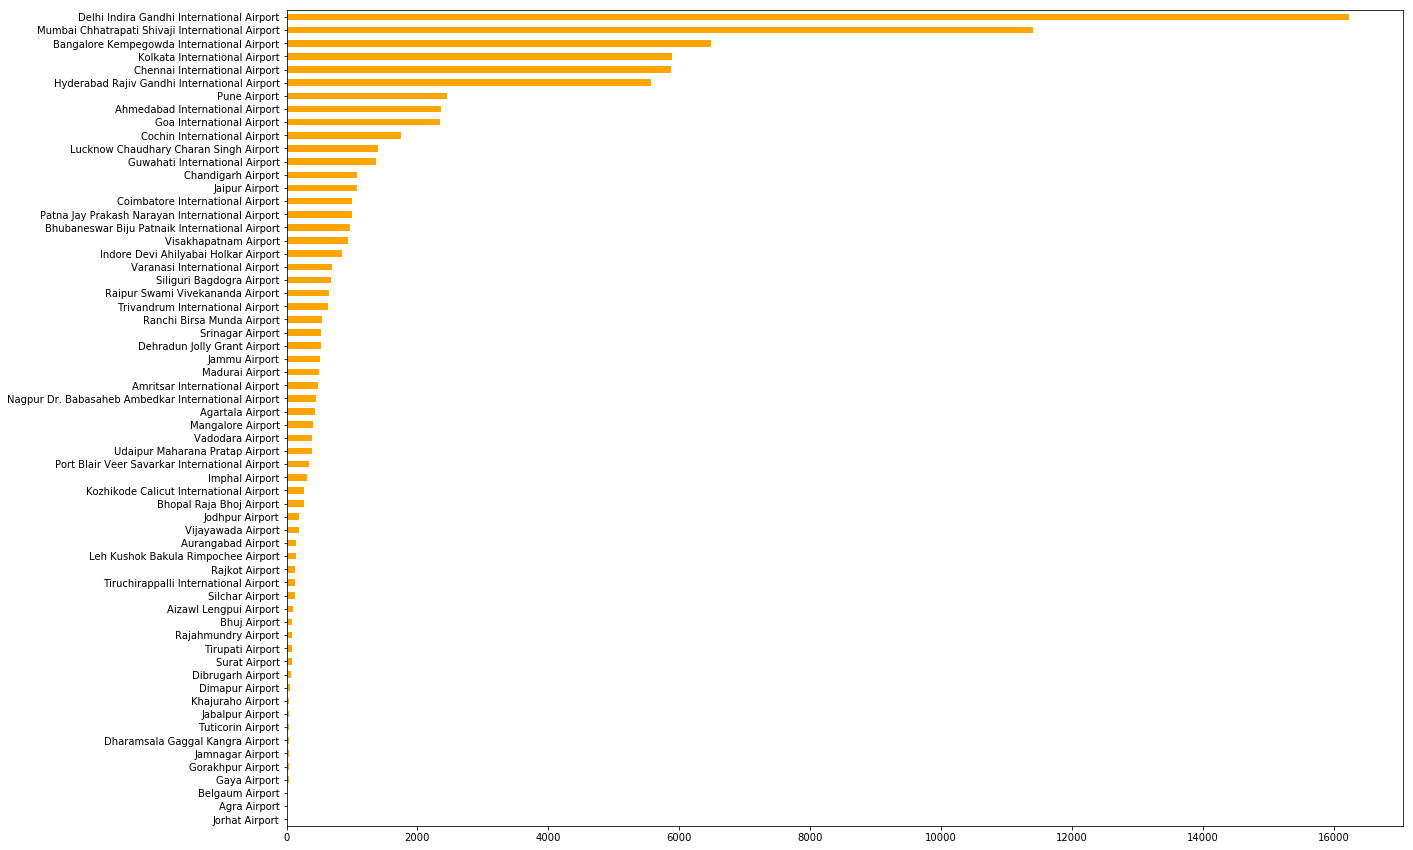

In [27]:
qwe.origin.value_counts(normalize=False,ascending=True).plot(kind="barh",figsize=(20,15),color="orange")

In [27]:
q=qwe.origin.value_counts()
print(q)

Delhi Indira Gandhi International Airport              18318
Mumbai Chhatrapati Shivaji International Airport       12856
Bangalore Kempegowda International Airport              7322
Kolkata International Airport                           6661
Chennai International Airport                           6625
Hyderabad Rajiv Gandhi International Airport            6287
Pune Airport                                            2756
Ahmedabad International Airport                         2684
Goa International Airport                               2635
Cochin International Airport                            1972
Lucknow Chaudhary Charan Singh Airport                  1586
Guwahati International Airport                          1584
Jaipur Airport                                          1260
Chandigarh Airport                                      1210
Coimbatore International Airport                        1125
Patna Jay Prakash Narayan International Airport         1125
Bhubaneswar Biju Patnaik

In [98]:
print(qwe["arrival_delay"].median())
print(qwe["arrival_delay"].mean())
print(qwe["arrival_delay"].std())
print(qwe["arrival_delay"].quantile(0.975))

-5.0
-1.161843644433755
26.78270697853887
60.0


## Filtering out delayed flights ( arrival_delay >0 )

In [31]:
#filtering out delayed flights,if arrival_delay is greater than 0 , it is considered delayed 

delayed_flights_0_min=qwe[qwe.arrival_delay>0]
delayed_flights_60_min=qwe[qwe.arrival_delay>60]
delayed_flights_120_min=qwe[qwe.arrival_delay>120]
#delayed_flights_0_min.to_csv("delayed_flight_final.csv")

In [32]:
#Printing the shape of delayed flights dataframes


print(delayed_flights_0_min.shape)
print(delayed_flights_60_min.shape)
print(delayed_flights_120_min.shape)


(32645, 24)
(2222, 24)
(497, 24)


In [33]:
delayed_flights_120_min.head()

,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
595,2017-03-01 04:28:52+00:00,VT-IDB,IndiGo,A320,Airbus A320-232,India,India,6E6698,Pune Airport,Delhi Indira Gandhi International Airport,...,2017-02-25 03:32:04,2017-02-25 05:16:00,Landed 05:17,6316,1152.3896833564875 km,151.0,172.0,0,Saturday,25
1186,2017-03-01 04:31:05+00:00,VT-IDN,IndiGo,A320,Airbus A320-232,India,India,6E314,Bhubaneswar Biju Patnaik International Airport,Delhi Indira Gandhi International Airport,...,2017-02-27 22:08:57,2017-02-28 00:12:00,Landed 00:13,7455,1276.1613617046855 km,172.0,203.0,18,Monday,27
1843,2017-03-01 04:33:09+00:00,VT-IDY,IndiGo,A320,Airbus A320-214,India,India,6E865,Chandigarh Airport,Delhi Indira Gandhi International Airport,...,2017-02-22 10:25:10,2017-02-22 11:07:00,Landed 11:07,2556,235.5263291167312 km,122.0,135.0,8,Wednesday,22
1913,2017-03-01 04:33:32+00:00,VT-IEA,IndiGo,A320,Airbus A320-232,India,India,6E819,Hyderabad Rajiv Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,...,2017-02-27 14:10:32,2017-02-27 15:58:00,Landed 15:59,6509,622.5796308496787 km,133.0,115.0,12,Monday,27
2243,2017-03-01 04:34:51+00:00,VT-IEH,IndiGo,A320,Airbus A320-232,India,India,6E3646,Siliguri Bagdogra Airport,Delhi Indira Gandhi International Airport,...,2017-02-27 14:48:45,2017-02-27 16:56:00,Landed 16:57,7703,1127.0288675949193 km,151.0,158.0,12,Monday,27


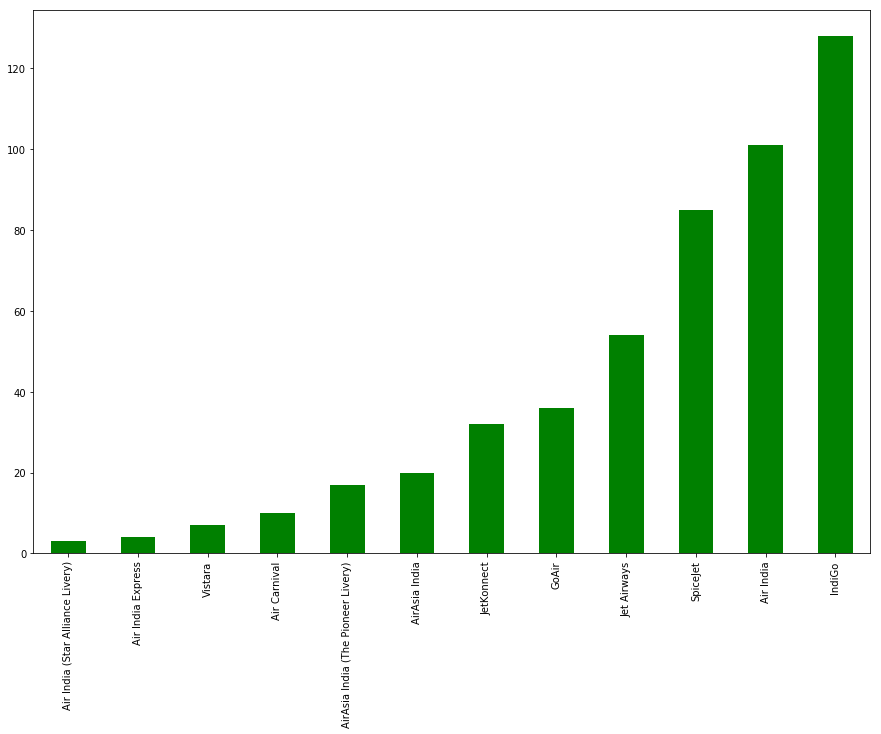

In [56]:
delayed_flights_120_min["airline_name"].value_counts(normalize=False,ascending=True).plot(kind="bar",figsize=(15,10),color="green")

In [61]:
delayed_flights_120_min[delayed_flights_120_min["airline_name"]=="IndiGo"]

,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
595,2017-03-01 04:28:52+00:00,VT-IDB,IndiGo,A320,Airbus A320-232,India,India,6E6698,Pune Airport,Delhi Indira Gandhi International Airport,...,2017-02-25 03:32:04,2017-02-25 05:16:00,Landed 05:17,6316,1152.3896833564875 km,151.0,172.0,0,Saturday,25
1186,2017-03-01 04:31:05+00:00,VT-IDN,IndiGo,A320,Airbus A320-232,India,India,6E314,Bhubaneswar Biju Patnaik International Airport,Delhi Indira Gandhi International Airport,...,2017-02-27 22:08:57,2017-02-28 00:12:00,Landed 00:13,7455,1276.1613617046855 km,172.0,203.0,18,Monday,27
1843,2017-03-01 04:33:09+00:00,VT-IDY,IndiGo,A320,Airbus A320-214,India,India,6E865,Chandigarh Airport,Delhi Indira Gandhi International Airport,...,2017-02-22 10:25:10,2017-02-22 11:07:00,Landed 11:07,2556,235.5263291167312 km,122.0,135.0,8,Wednesday,22
1913,2017-03-01 04:33:32+00:00,VT-IEA,IndiGo,A320,Airbus A320-232,India,India,6E819,Hyderabad Rajiv Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,...,2017-02-27 14:10:32,2017-02-27 15:58:00,Landed 15:59,6509,622.5796308496787 km,133.0,115.0,12,Monday,27
2243,2017-03-01 04:34:51+00:00,VT-IEH,IndiGo,A320,Airbus A320-232,India,India,6E3646,Siliguri Bagdogra Airport,Delhi Indira Gandhi International Airport,...,2017-02-27 14:48:45,2017-02-27 16:56:00,Landed 16:57,7703,1127.0288675949193 km,151.0,158.0,12,Monday,27
2244,2017-03-01 04:34:51+00:00,VT-IEH,IndiGo,A320,Airbus A320-232,India,India,6E797,Kolkata International Airport,Siliguri Bagdogra Airport,...,2017-02-27 13:10:05,2017-02-27 14:09:00,Landed 14:09,3557,446.16531989483883 km,149.0,155.0,10,Monday,27
2245,2017-03-01 04:34:51+00:00,VT-IEH,IndiGo,A320,Airbus A320-232,India,India,6E797,Chennai International Airport,Kolkata International Airport,...,2017-02-27 10:18:19,2017-02-27 12:16:00,Landed 12:16,7110,1381.519359039848 km,136.0,148.0,7,Monday,27
2246,2017-03-01 04:34:51+00:00,VT-IEH,IndiGo,A320,Airbus A320-232,India,India,6E233,Bangalore Kempegowda International Airport,Chennai International Airport,...,2017-02-27 08:30:59,2017-02-27 09:21:00,Landed 09:26,3341,269.3407262208813 km,121.0,130.0,6,Monday,27
2446,2017-03-01 04:35:37+00:00,VT-IEL,IndiGo,A320,Airbus A320-232,India,India,6E4651,Mumbai Chhatrapati Shivaji International Airport,Indore Devi Ahilyabai Holkar Airport,...,2017-02-27 17:13:01,2017-02-27 18:12:00,Landed 18:11,3513,504.84767891268876 km,122.0,148.0,14,Monday,27
3085,2017-03-01 04:37:54+00:00,VT-IEX,IndiGo,A320,Airbus A320-232,India,India,6E711,Varanasi International Airport,Mumbai Chhatrapati Shivaji International Airport,...,2017-02-27 12:31:28,2017-02-27 15:03:00,Landed 15:06,9276,1246.9846863567861 km,143.0,131.0,10,Monday,27


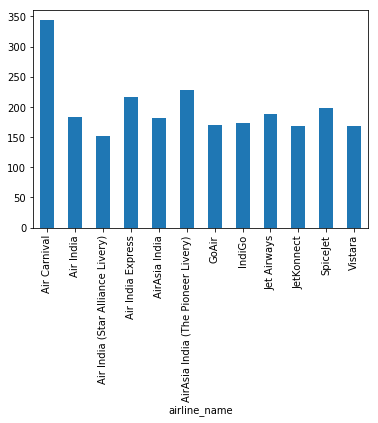

In [34]:
delayed_flights_120_min.groupby("airline_name").arrival_delay.mean().plot(kind="bar")

## Analysing flights delayed by more than zero mins

In [62]:
# importing libraries for plotting 

import matplotlib.pyplot as plt 
%matplotlib inline
del delayed_flights_0_min['timestamp']

In [63]:
# Checking the structure of dataset 

delayed_flights_0_min.head()

,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
11,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,...,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,56.0,67.0,10,Tuesday,28
18,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E238,Ahmedabad International Airport,Chennai International Airport,2017-02-27 09:55:00,...,2017-02-27 10:18:32,2017-02-27 12:24:00,Landed 12:24,7564,1371.7036839622774 km,14.0,23.0,9,Monday,27
20,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E238,Kolkata International Airport,Jaipur Airport,2017-02-27 05:20:00,...,2017-02-27 05:23:10,2017-02-27 07:35:00,Landed 07:44,8474,1358.1577783850107 km,10.0,3.0,5,Monday,27
30,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E6493,Bangalore Kempegowda International Airport,Kolkata International Airport,2017-02-25 18:15:00,...,2017-02-25 18:46:18,2017-02-25 20:57:00,Landed 21:00,8076,1544.731830735519 km,17.0,31.0,18,Saturday,25
36,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E963,Delhi Indira Gandhi International Airport,Bangalore Kempegowda International Airport,2017-02-24 19:45:00,...,2017-02-24 19:59:29,2017-02-24 22:32:33,Landed 22:32,9184,1702.6538858818212 km,2.0,14.0,19,Friday,24


## Descriptive statistics for "arrival_delay" variable

In [95]:
print("Average arrival delay across all airports when delayed by>0 min :{}".format(delayed_flights_0_min.arrival_delay.mean()))
print("Median arrival delay across all airports when delayed by >0 min:{}".format(delayed_flights_0_min.arrival_delay.median()))
print("Standard deviation of the arrival delay when delayed by >0 min  :{}".format(delayed_flights_0_min.arrival_delay.std()))
print("97th percentile  of the arrival delay when delayed by >0 min  :{}".format(delayed_flights_0_min.arrival_delay.quantile(0.97)))

Average arrival delay across all airports when delayed by>0 min :22.52822790626436
Median arrival delay across all airports when delayed by >0 min:14.0
Standard deviation of the arrival delay when delayed by >0 min  :30.456388013423393
97th percentile  of the arrival delay when delayed by >0 min  :90.0


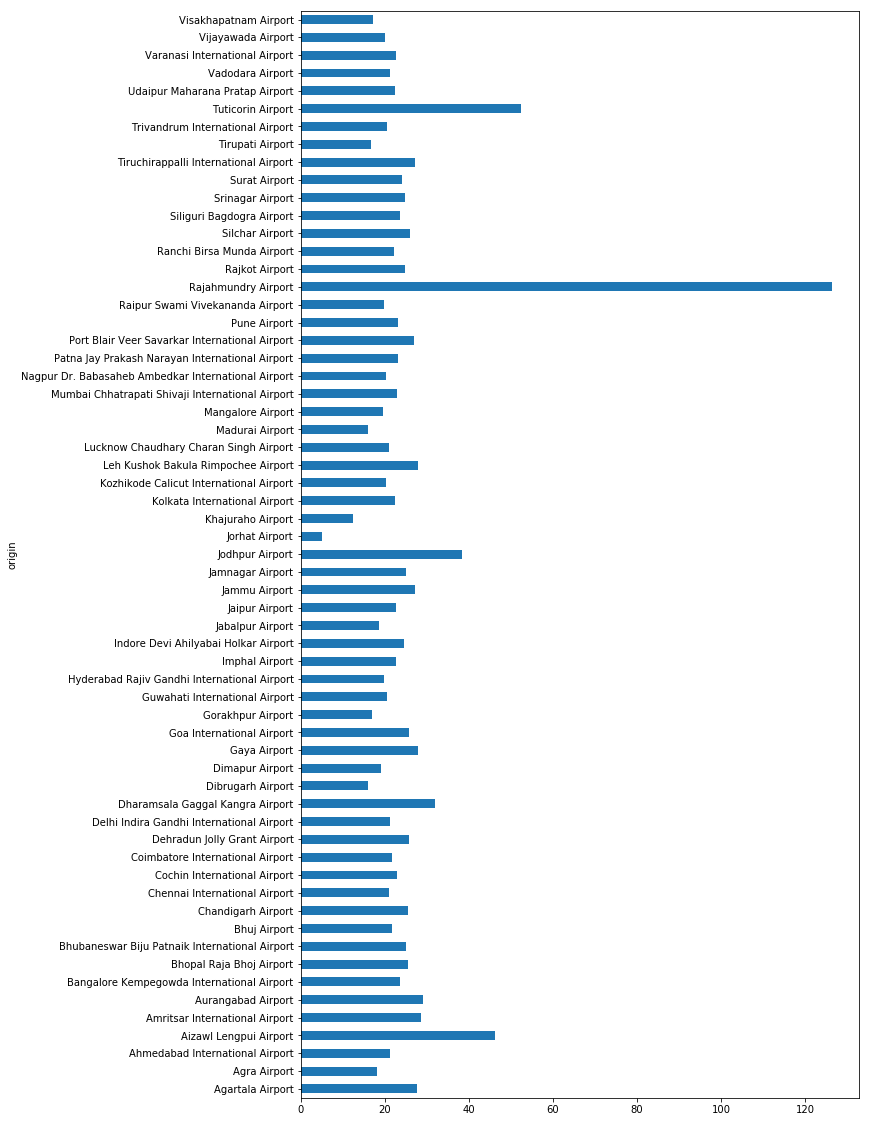

In [36]:
delayed_flights_0_min.groupby("origin").arrival_delay.mean().plot(kind="barh",figsize=(10,20))


# Average arrival delay on hourly basis

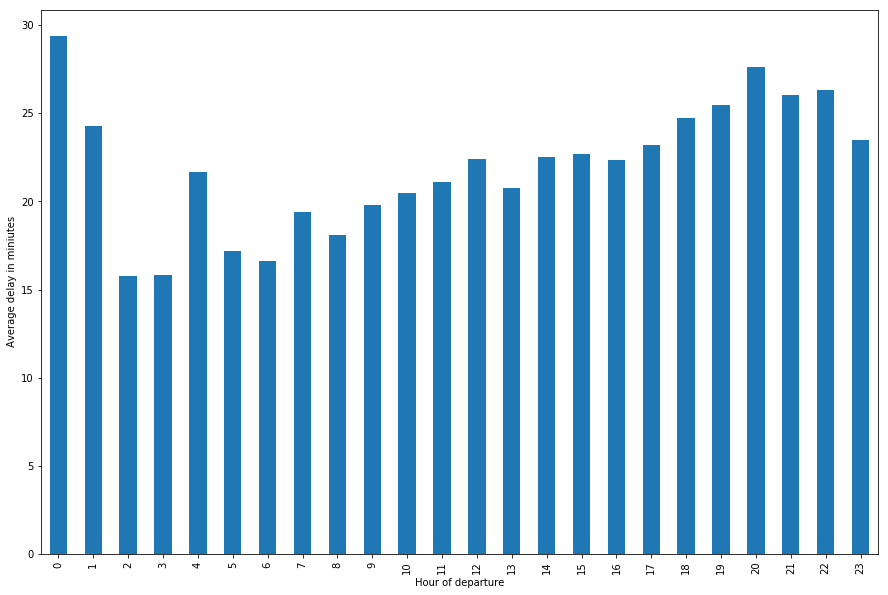

In [37]:
delayed_flights_0_min.groupby("hour_dep").arrival_delay.mean().plot(kind="bar",figsize=(15,10))
plt.xlabel("Hour of departure")
plt.ylabel(" Average delay in miniutes")

# Average arrival delay based on weekdays

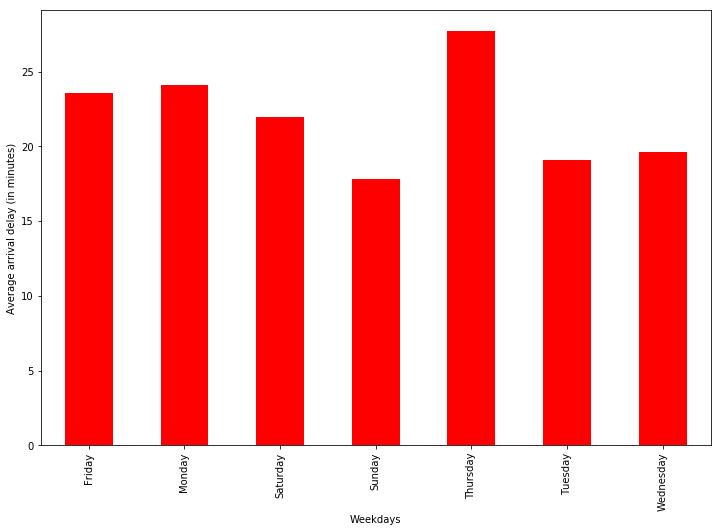

In [46]:
import numpy as np
delayed_flights_0_min.groupby("weekday_dep").arrival_delay.mean().plot(kind="bar",figsize=(12,8),color="r")
plt.ylabel("Average arrival delay (in minutes)")
#plt.yticks(np.array(["Friday","Sataurday","Sunday","Monday","Tuesday","Wednesday","Thursday"]))
plt.xlabel("Weekdays")

In [43]:
delayed_stats=delayed_flights_0_min.groupby('airline_name').arrival_delay.agg(["mean","median"])

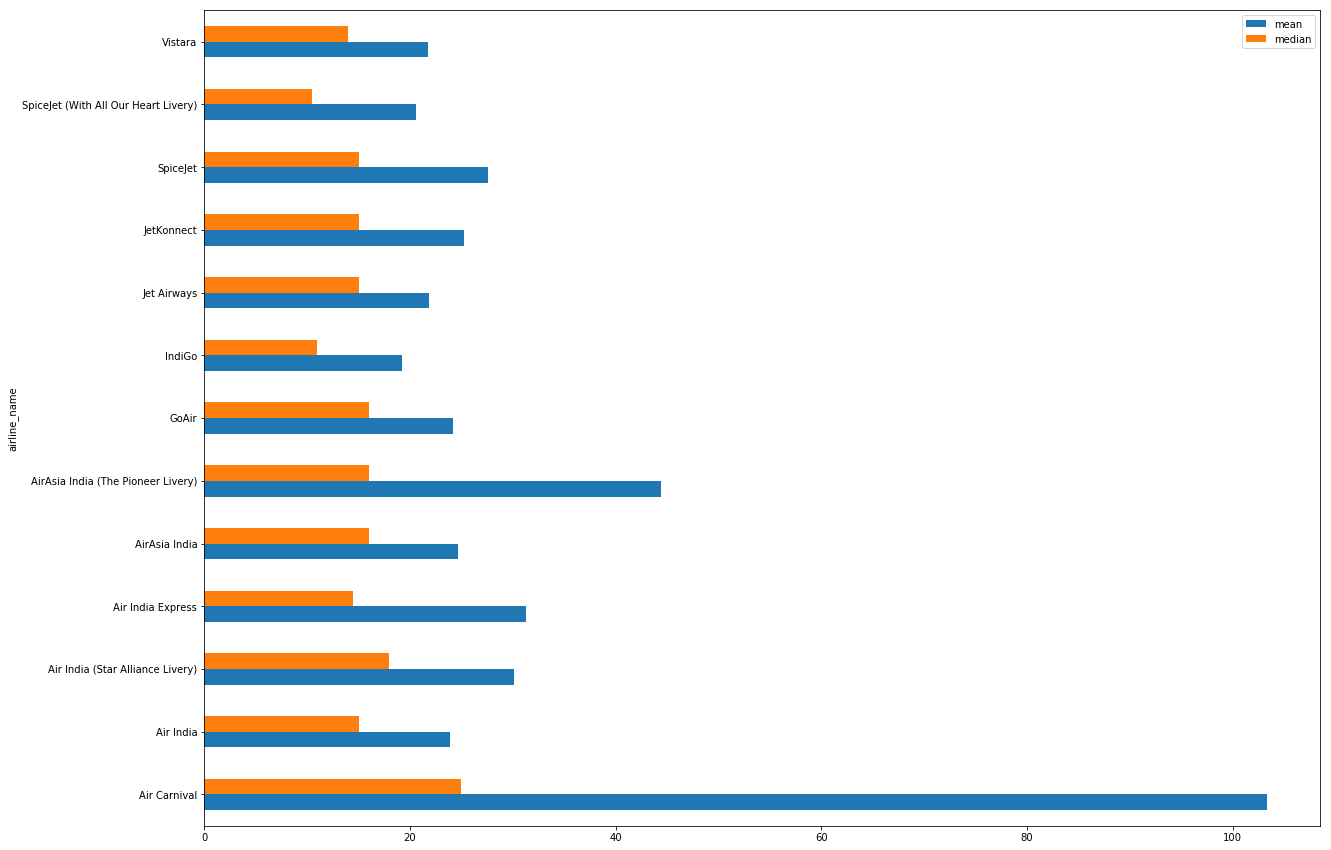

In [44]:

delayed_stats.plot(kind='barh',figsize=(20,15))

### Average delay by  registration number 

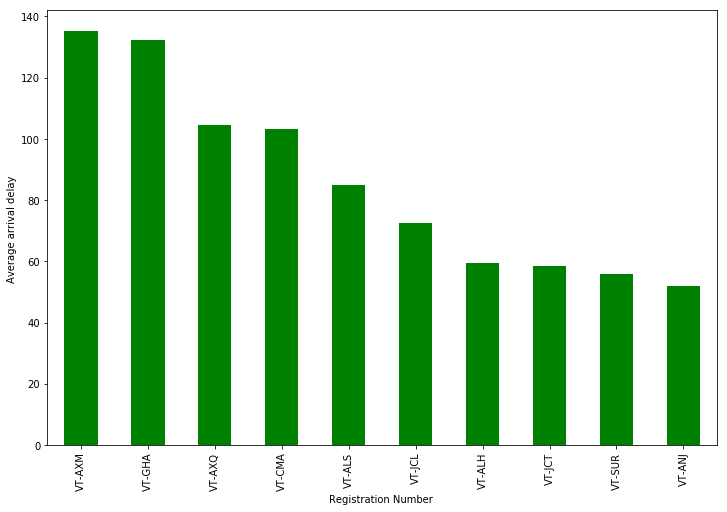

In [45]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:10].plot(kind="bar",color="g",
                                                                                                  figsize=(12,8))
plt.xlabel("Registration Number ")
plt.ylabel("Average arrival delay ")

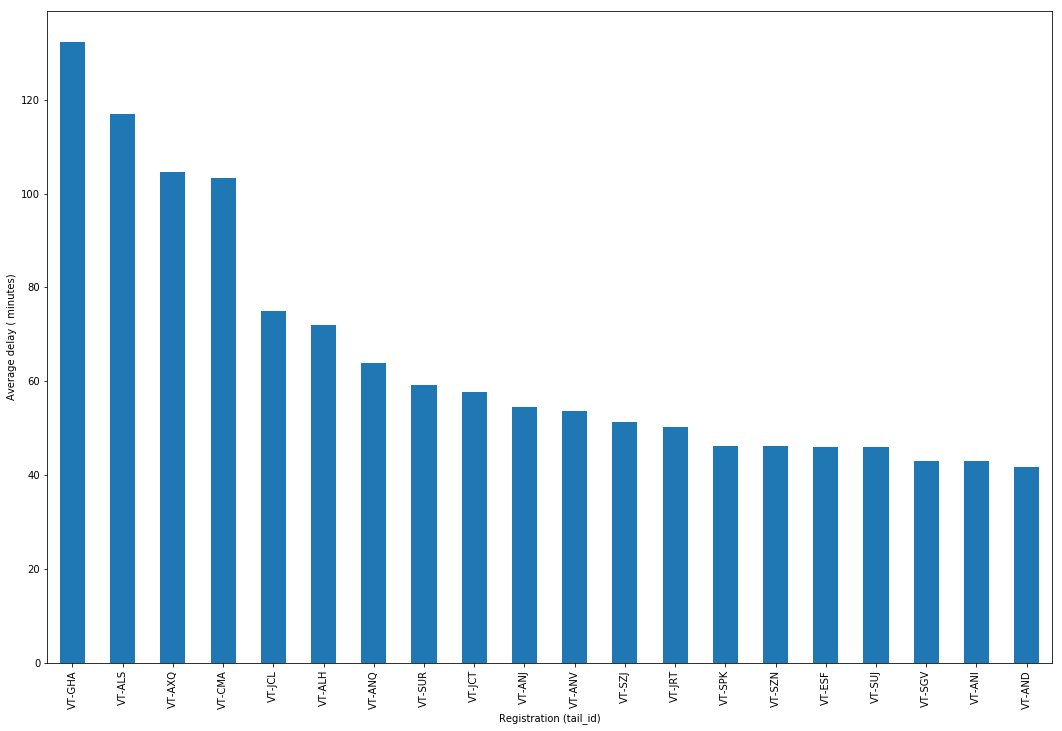

In [45]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:20].plot(kind="bar",figsize=(18,12))
plt.xlabel("Registration (tail_id)")
plt.ylabel("Average delay ( minutes)")

# Distribution of flight delays

### 1.Percentage of flights with  Less than  or equal to 15 minutes delay 

In [47]:
    (delayed_flights_0_min[delayed_flights_0_min.arrival_delay<=15].arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"]))*100

54.6331750650942

### 2.Percentage of  flights with  arrival delay greater than 15 min but less than or equal 30 min

In [48]:
x=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>15][delayed_flights_0_min.arrival_delay<=30]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(x*100)

23.8780824016


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 3. Percentage of flights with arrival delay greater than 30 min  but less than or equal to 60 min

In [50]:
y=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>30][delayed_flights_0_min.arrival_delay<=60]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(y*100)

14.682187165


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 4. Percentage of flights with arrival delay greater than 60 min but less than or equal to 2 hours

In [51]:
z=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>60][delayed_flights_0_min.arrival_delay<=120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(z*100)

5.28411701639


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 5.Percentage of  flight with arrival delay greater than 2 hour

In [52]:
p=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(p*100)

1.52243835197


In [51]:
q=delayed_flights_0_min.groupby("flight_number").arrival_delay.mean()

In [52]:
type(q)

pandas.core.series.Series

In [53]:
q[q>30].sort_values(ascending=False)[0:5]


flight_number
2S102     268.444444
6E523     238.000000
9W2760    203.000000
G8702     199.666667
SG170     196.500000
Name: arrival_delay, dtype: float64

In [60]:
#print("flight {} flown  {} number of times".format("SG999",new_data[new_data.flight_number=="SG999"].origin.count()))



In [24]:
qwe.shape

(80907, 24)

In [83]:
from bokeh.plotting import figure, output_notebook, show

In [84]:
output_notebook()

Loading BokehJS ...

In [88]:
#p = figure(width=500, height=500)
#p.circle(qwe.origin.value_counts(),qwe.groupby("origin").arrival_delay.mean())
#p.circle(x, y, size=7, color="firebrick", alpha=0.5)
#show(p)

In [54]:
qwe.shape

(80907, 24)

In [25]:
qwe=qwe[qwe.duration!="None"]
qwe=qwe[qwe.flight_number!="None"]
qwe=qwe[qwe.reg!="None"]
qwe=qwe[qwe.origin!="None"]
qwe=qwe[qwe.destination!="None"]
#qwe=qwe[qwe.hour_dep!="None"]
#qwe=qwe[qwe.day_of_month_dep!="None"]
qwe=qwe[qwe.weekday_dep!="None"]
print(qwe.shape)


(80894, 24)


In [26]:
features=qwe[["airline_name","flight_number","origin","destination","hour_dep","day_of_month_dep","weekday_dep"]]

In [27]:
labels=qwe["arrival_delay"]
label=[]
for items in labels:
    if items>60:
        label.append(1)
    else:
        label.append(0)
        
print(len(label))

80894


In [28]:
features_final=pd.get_dummies(features,drop_first=True)


In [29]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import numpy
from sklearn.metrics import accuracy_score


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(features_final,numpy.array(label),test_size=0.30,random_state=42)

In [31]:
X_train.shape

(56625, 2343)

In [ ]:
Y_train.shape

In [33]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
pred=clf.predict(X_test)
print(accuracy_score(pred,Y_test))


0.966953726977


In [49]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,fbeta_score
print(confusion_matrix(pred,Y_test))
print(precision_score(pred,Y_test))
print(recall_score(pred,Y_test))
print(fbeta_score(pred,Y_test,beta=0.5))

[[23274   448]
 [  354   193]]
0.301092043682
0.352833638026
0.31018964963


In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {"min_samples_split":[2,3,4,5,6,7,8,9,10]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit =grid_obj.fit(X_train,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
#print ("Unoptimized model\n------")
#print "Accuracy score on testing data: {:.4f}".format(accuracy_score(Y_test, predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
#print "\nOptimized Model\n------"
#print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions))
#print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
print(grid_fit.best_estimator_)

In [ ]:

predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(accuracy_score(Y_test,best_predictions))

In [ ]:
print(fbeta_score(Y_test,best_predictions,0.5))

In [ ]:
print(precision_score(Y_test,best_predictions))